# <span style="color:yellow">New Classes and Some Functions</span>

In [2]:
from TMclass import *
import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from xml.etree import ElementTree


def flush_many(max_vol, vol_dataset, phi_mode, start, nbits, ndata, level, partition):
    global PHI
    global phi

    def _new_start(start,end):
        start += datetime.timedelta(days=1)
        start = start.replace(hour=3,minute=0,second=0)
        if end > start:
            start = end + datetime.timedelta(hours=1)
        return start
    

    vol0 = max_vol[0]
    vol1 = max_vol[1]
    n0 = int(vol0 // vol_dataset * 0.99)
    n1 = int(vol1 // vol_dataset * 0.99)

    if ndata == -1:
        ndata = phi_mode.raw.n_datasets
    
    print(f'Days needed: {(ndata-n0)//n1+2}')
    kw = phi_mode.compressing(start, nbits = nbits, ndata = n0,level=level); phi.saving(partition,**kw); PHI.saving(partition,**kw)
    # start += datetime.timedelta(days=1)
    start = _new_start(start,kw['end'])

    for i in range((ndata-n0)//n1+1):
        kw = phi_mode.compressing(start, nbits = nbits, ndata = n1,level=level); phi.saving(partition,**kw); PHI.saving(partition,**kw)
        start = _new_start(start,kw['end'])

    return (phi_mode, kw)

PHI = PHI_MEMORY(datetime.datetime.fromisoformat('2022-01-19T23:00:00'))

TM = {'date':[], 'tm_rate':[], 'duration':[]}
TMnew = {'date':[], 'tm_rate':[], 'duration':[]}

with open('../telem.xml') as f:
	tree = ElementTree.parse(f)

for node in tree.iter('PASS'):
    d = datetime.datetime.fromisoformat(node.attrib.get('comment')[:-1]).date()
    if d >= datetime.date(2022,1,1) and d <= datetime.date(2023,1,1):
        TM['date'] += [datetime.datetime.fromisoformat(node.attrib.get('comment')[:-1])]
        TM['tm_rate'] += [float(node.attrib.get('tm_rate'))]
        TM['duration'] += [int(node.attrib.get('duration'))]

with open('../EFECS_M06_V00.xml') as f:
	tree = ElementTree.parse(f)

for node in tree.iter('PASS'):
    d = datetime.datetime.strptime(node.attrib.get('time')[:-1],"%Y-%jT%H:%M:%S").date()
    if d >= datetime.date(2022,1,1) and d <= datetime.date(2023,1,1):
        TMnew['date'] += [datetime.datetime.strptime(node.attrib.get('time')[:-1],"%Y-%jT%H:%M:%S")]
        TMnew['tm_rate'] += [float(node.attrib.get('tm_rate'))]
        TMnew['duration'] += [int(node.attrib.get('duration'))]

TM['date'] = np.asarray(TM['date'])
TM['tm_rate'] = np.asarray(TM['tm_rate'])
TM['duration'] = np.asarray(TM['duration'])

TMnew['date'] = np.asarray(TMnew['date'])
TMnew['tm_rate'] = np.asarray(TMnew['tm_rate'])
TMnew['duration'] = np.asarray(TMnew['duration'])

f = open('phi.itl','r')
lines = f.readlines()

FL = {'date':[], 'flush':[]}

for x in lines:
    temp = x.split(' ')
    if 'PHI_SCI_Flush_VOL' in temp[-1]:
        FL['date'] += [datetime.datetime.fromisoformat(temp[0][:-1])]
        FL['flush'] += [float(temp[-1][19:-2])]
        # print(temp[0][:-1],temp[-1][19:-2])

FL['date'] = np.asarray(FL['date'])
FL['flush'] = np.asarray(FL['flush'])

f = open('phi.itl','r')
lines = f.readlines()

# SV = {'date':[], 'rate':[]}

# for x in lines:
#     temp = x.split(' ')
#     if 'PHI_SCI_Rate' in temp[-1]:
#         SV['date'] += [datetime.datetime.fromisoformat(temp[0][:-1])]
#         SV['rate'] += [float(temp[-1][14:-2])]
#         # print(temp[0][:-1],temp[-1][19:-2])

# SV['date'] = np.asarray(SV['date'])
# SV['rate'] = np.asarray(SV['rate'])

f = open('phi_new.itl','r')
lines = f.readlines()

FLnew = {'date':[], 'flush':[]}

for x in lines:
    temp = x.split(' ')
    if 'PHI_SCI_Flush_VOL' in temp[-1]:
        FLnew['date'] += [datetime.datetime.fromisoformat(temp[0][:-1])]
        FLnew['flush'] += [float(temp[-1][19:-2])]
        # print(temp[0][:-1],temp[-1][19:-2])

FLnew['date'] = np.asarray(FLnew['date'])
FLnew['flush'] = np.asarray(FLnew['flush'])



Text(0.5, 0, 'date')

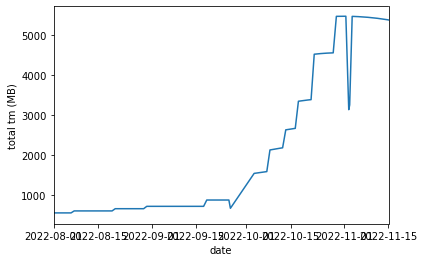

In [3]:
plt.plot(TM['date'], (TM['tm_rate']*TM['duration'])/8/1e6)#; plt.ylim(0,5000)
plt.xlim(datetime.date(2022,8,1),datetime.date(2022,11,15))
# plt.plot(TMnew['date'], np.cumsum(TMnew['tm_rate']*TMnew['duration']));
# plt.ylabel('total tm_rate (bit/s)')
plt.ylabel('total tm (MB)')
plt.xlabel('date')


# <span style="color:blue">R_FULL_LRES_HCAD_Full-Disk-Helioseismology</span>


In [4]:
t0 = datetime.datetime.fromisoformat('2022-01-20T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-01-22T00:00:00')
phi = PHI_MEMORY(t0)

hcrop = 640
hsm_1 = PHI_MODE('FDT')
kw = hsm_1.observation(t0,t1,cadence=1,shape=(2048,hcrop,1,6)); PHI.saving(1,**kw)

# t0 = hsm_1.raw.end

# PHI.copy_partition(1,t0)
# PHI.format_partition(1,PHI.part1.history['end'][-1])


t0 = datetime.datetime.fromisoformat('2022-01-22T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-01-24T00:00:00')
a1_2 = PHI_MODE('FDT')
kw = a1_2.observation(t0,t1,cadence=1,shape=(2048,hcrop,1,6)); PHI.saving(2,**kw)

t0 = a1_2.raw.end

kw = hsm_1.cropping(t0,ndata=-1,crop=[hcrop,hcrop],level='raw'); PHI.saving(1,**kw)
kw = hsm_1.packing(hsm_1.raw.crop.end,ndata=-1,level='raw.crop'); PHI.saving(1,**kw)

# kw = hsm_1.compressing(hsm_1.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); PHI.saving(1,**kw)
hsm_1, kw = flush_many([1350,1350], 2.4, hsm_1, kw['end'], 6, -1, 'raw.pack',1)

t0 = hsm_1.compr.pack.end
kw = a1_2.cropping(t0,ndata=-1,crop=[hcrop,hcrop],level='raw'); PHI.saving(2,**kw)
kw = a1_2.packing(a1_2.raw.crop.end,ndata=-1,level='raw.crop'); PHI.saving(2,**kw)

# kw = a1_2.compressing(a1_2.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); PHI.saving(2,**kw)
a1_2, kw = flush_many([1350,1350], 2.4, a1_2, kw['end'], 6, -1, 'raw.pack',2)

end = kw['end']
########################################################
printp(hsm_1, label='R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 1')
print('==========================\n')
printp(a1_2, label='R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 2')
# plot_tot(PHI)

Days needed: 6
Exceeding the number of datasets, ndata set to 100
Days needed: 6
Exceeding the number of datasets, ndata set to 100
R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 1
number of datasets: 2880
cadence: 1 mins
duration: 2 days, 0:00:00
amount of raw-data at 32 bits: 109863.3 MiB, 38.1 MiB per dataset
amount of crop-data at 32 bits: 65918.0 MiB, 22.9 MiB per dataset
cropping time: 20:27:04.320000
amount of pack-data at 16 bits: 43945.3 MiB, 15.3 MiB per dataset
packing time: 22:57:33.301440
compressing (+ flushing) time: 0:24:41.760000
amount of compressed data + metadata at 6 bits: 5087.2 MiB, 1.8 MiB per dataset
amount of metadata:  69120 MiB
amount of memory usage: 219726.6 MiB


R_FULL_LRES_HCAD_Full-Disk-Helioseismology - Partition 2
number of datasets: 2880
cadence: 1 mins
duration: 2 days, 0:00:00
amount of raw-data at 32 bits: 109863.3 MiB, 38.1 MiB per dataset
amount of crop-data at 32 bits: 65918.0 MiB, 22.9 MiB per dataset
cropping time: 20:27:04.320000
am

In [5]:
print('cropping and packing duration:',(hsm_1.raw.pack.end - hsm_1.raw.pack.start + hsm_1.raw.crop.end - hsm_1.raw.crop.start)*2)
print('compression duration:',(hsm_1.compr.pack.end - hsm_1.compr.pack.start)*2)

cropping and packing duration: 3 days, 14:49:15.242880
compression duration: 0:49:23.520000


# <span style="color:magenta">***RESET NANDs***</span>

In [6]:
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
# print('TM time:',round((PHI.part1.compr + PHI.part2.compr)/2151.3,2), 'days')
# PHI.format_partition(1,datetime.datetime(2022,1,29,16,0,0))
# PHI.format_partition(2,end + datetime.timedelta(hours=1))
# PHI.format_partition(1,end + datetime.timedelta(hours=1))
# PHI.format_partition(2,PHI.part1.history['end'][-1] + datetime.timedelta(hours=.5))
PHI.format_partition(1,hsm_1.compr.pack.end + datetime.timedelta(hours=1))
PHI.format_partition(2,end + datetime.timedelta(hours=1))

amount of compressed data + metadata in partition 1: 5.33 GB
amount of compressed data + metadata in partition 2: 5.33 GB


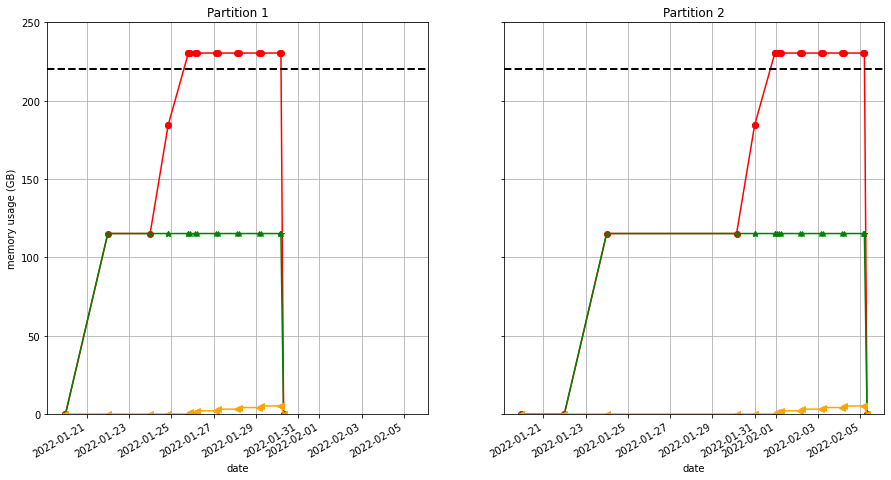

In [7]:
plot_tot(PHI,ylim=(0,250))

In [8]:
PHI.part1.occu*4/5

0.0

# <span style="color:blue">Raw Synoptic</span>

In [9]:
i=1
########################################################

# t0 = datetime.datetime.fromisoformat('2022-02-05T00:00:00')
t0 = datetime.datetime.fromisoformat('2022-01-30T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-02-20T00:00:00')

cad = 1*60
N = int((t1 - t0).total_seconds() / (60*cad))

ti = t0
deltat = (t1 - t0)/N
min1 = datetime.timedelta(minutes=1)
form = False
for n in range(N):
    a19 = PHI_MODE('FDT')
    # ti = ti + dt
    kw = a19.observation(ti,ti+min1,cadence=1,shape=(2048,1024,4,6));
    PHI.saving(i,**kw)
    t0 = a19.raw.end
    kw = a19.cropping(t0,ndata=-1,crop=[1024,1024],level='raw');
    PHI.saving(i,**kw)
    kw = a19.packing(a19.raw.crop.end,ndata=-1,level='raw.crop');
    PHI.saving(i,**kw)
    kw = a19.compressing(a19.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); 
    PHI.saving(i,**kw)
    ti = ti + deltat
    if PHI.part1.occu > 200e3 or PHI.part2.occu > 200e3:
        print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
        print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
        PHI.format_partition(i,kw['end'])
        # phi.format_partition(i,kw['end'])
        i = i%2 + 1

# tm0 = datetime.datetime(2022,2,1,0,0,0)
# tm1 = datetime.datetime(2022,2,20,0,0,0)
# _ = tm_avail(tm0,tm1,df_tm,frac=.2)
# print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
# print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')


print(N,'total datasets:\n')
printp(a19, label = 'Raw Synoptic (1 dataset)')

end = kw['end']
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
# print('TM time:',round((PHI.part1.compr + PHI.part2.compr)/2151.3,2), 'days')
PHI.format_partition(1,end + datetime.timedelta(hours=1))
# PHI.format_partition(2,end + datetime.timedelta(days=1))


504 total datasets:

Raw Synoptic (1 dataset)
number of datasets: 1
cadence: 1 mins
duration: 0:01:00
amount of raw-data at 32 bits: 206.0 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 106.8 MiB, 106.8 MiB per dataset
cropping time: 0:00:44.518000
amount of pack-data at 16 bits: 61.0 MiB, 61.0 MiB per dataset
packing time: 0:00:41.441600
compressing (+ flushing) time: 0:02:31.066944
amount of compressed data + metadata at 6 bits: 18.0 MiB, 18.0 MiB per dataset
amount of metadata:  24 MiB
amount of memory usage: 373.8 MiB

amount of compressed data + metadata in partition 1: 9.52 GB
amount of compressed data + metadata in partition 2: 0.0 GB


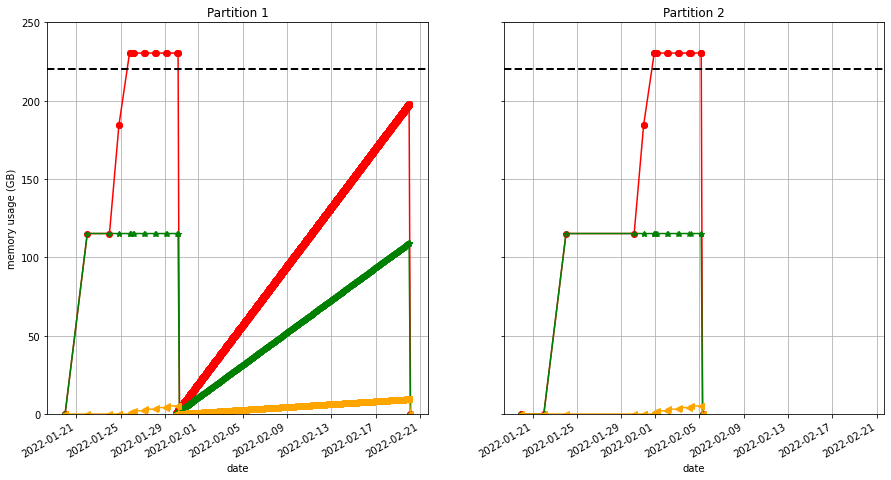

In [10]:
plot_tot(PHI,ylim=(0,250))

# <span style="color:orange"> *RSW 1*</span>

In [11]:
dt = datetime.timedelta(seconds=0)
dtc = datetime.timedelta(seconds=0)

# <span style="color:blue">CC_OFFPOI_OOF </span>

In [12]:
phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-02-23T18:00:00'))

########################################################
t0 = datetime.datetime.fromisoformat('2022-02-23T18:30:00')
t1 = datetime.datetime.fromisoformat('2022-02-23T21:30:00')
a2 = PHI_MODE('FDT')
kw = a2.observation(t0,t1,cadence=90,shape=(2048,1024,4,6)); phi.saving(1,**kw); PHI.saving(1,**kw)

t0 = a2.raw.end
kw = a2.cropping(t0,ndata=-1,crop=[1024,1024],level='raw'); phi.saving(1,**kw); PHI.saving(1,**kw); dt += a2.raw.crop.cpu_time * a2.raw.crop.this_run
kw = a2.processing(a2.raw.crop.end,ndata=-1,partialStore=0x00,level='raw.crop',nout=5); phi.saving(1,**kw); PHI.saving(1,**kw); dt += a2.proc.crop.cpu_time * a2.proc.crop.this_run
kw = a2.compressing(a2.proc.crop.end, nbits = 6, ndata = -1,level='proc.crop'); phi.saving(1,**kw); PHI.saving(1,**kw); dtc += a2.compr.crop.cpu_time * a2.compr.crop.this_run

########################################################
t0 = datetime.datetime.fromisoformat('2022-02-26T07:50:00')
t1 = datetime.datetime.fromisoformat('2022-02-26T10:50:00')
a3 = PHI_MODE('FDT')
kw = a3.observation(t0,t1,cadence=90,shape=(2048,1024,4,6)); phi.saving(1,**kw); PHI.saving(1,**kw)

t0 = a3.raw.end
kw = a3.cropping(t0,ndata=-1,crop=[1024,1024],level='raw'); phi.saving(1,**kw); PHI.saving(1,**kw); dt += a3.raw.crop.cpu_time * a3.raw.crop.this_run
kw = a3.processing(a3.raw.crop.end,ndata=-1,partialStore=0x00,level='raw.crop',nout=5); phi.saving(1,**kw); PHI.saving(1,**kw); dt += a3.proc.crop.cpu_time * a3.proc.crop.this_run
kw = a3.compressing(a3.proc.crop.end, nbits = 6, ndata = -1,level='proc.crop'); phi.saving(1,**kw); PHI.saving(1,**kw); dtc += a3.compr.crop.cpu_time * a3.compr.crop.this_run

########################################################
########################################################
printp(a2, label='CC_OFFPOI_OOF - 1')
print('==========================\n')
printp(a3, label='CC_OFFPOI_OOF - 2')

# print('amount of compressed raw-data + metadata at',a1.compr.n_bits,'bits:',round(phi.part1.compr,1), 'MB')
# print('number of datasets:',a1.raw.n_datasets+a2.raw.n_datasets+a3.raw.n_datasets)
# _ = phi.plot(1,bar=True)
# plot_tot(PHI)

CC_OFFPOI_OOF - 1
number of datasets: 2
cadence: 90 mins
duration: 3:00:00
amount of raw-data at 32 bits: 412.0 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 213.6 MiB, 106.8 MiB per dataset
cropping time: 0:01:29.036000
processing time: 1:10:00
amount of processed data (and intermediate data) at 16 bits: 244.1 MiB, 22.9 MiB per dataset
compressing (+ flushing) time: 0:01:10.114560
amount of compressed data + metadata at 6 bits: 8.4 MiB, 4.2 MiB per dataset
amount of metadata:  48 MiB
amount of memory usage: 885.0 MiB


CC_OFFPOI_OOF - 2
number of datasets: 2
cadence: 90 mins
duration: 3:00:00
amount of raw-data at 32 bits: 412.0 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 213.6 MiB, 106.8 MiB per dataset
cropping time: 0:01:29.036000
processing time: 1:10:00
amount of processed data (and intermediate data) at 16 bits: 244.1 MiB, 22.9 MiB per dataset
compressing (+ flushing) time: 0:01:10.114560
amount of compressed data + metadata at 6 bits: 8.4 MiB, 4.2 Mi

# <span style="color:blue">L_SMALL_MRES_MCAD_Connection-Mosaic</span>

In [13]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-01T23:30:00'))
########################################################


t0 = datetime.datetime.fromisoformat('2022-03-02T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-03-03T03:00:00')
cad = 300
N = int((t1 - t0).total_seconds() / (60*cad))

ti = t0
deltat = (t1 - t0)/N
min1 = datetime.timedelta(minutes=1)
for n in range(N):
    a4 = PHI_MODE('FDT')
    # ti = ti + dt
    kw = a4.observation(ti,ti+min1,cadence=1,shape=(2048,1024,4,6));
    phi.saving(1,**kw); PHI.saving(1,**kw)

    t0 = a4.raw.end
    kw = a4.cropping(t0,ndata=-1,crop=[1024,1024],level='raw'); 
    phi.saving(1,**kw); PHI.saving(1,**kw)

    kw = a4.processing(a4.raw.crop.end,ndata=-1,partialStore=0x00,level='raw.crop',nout=5); 
    phi.saving(1,**kw); PHI.saving(1,**kw)

    kw = a4.compressing(a4.proc.crop.end, nbits = 6, ndata = -1,level='proc.crop'); 
    phi.saving(1,**kw); PHI.saving(1,**kw)

    ti = ti + deltat
    # t0 = ti

    # printp(a4)

########################################################
# printp(a4)
print(N,'total datasets:\n')
printp(a4, label = 'L_SMALL_MRES_MCAD_Connection-Mosaic (1 dataset)')
# plot_tot(phi, ylim=(0,10))

5 total datasets:

L_SMALL_MRES_MCAD_Connection-Mosaic (1 dataset)
number of datasets: 1
cadence: 1 mins
duration: 0:01:00
amount of raw-data at 32 bits: 206.0 MiB, 206.0 MiB per dataset
amount of crop-data at 32 bits: 106.8 MiB, 106.8 MiB per dataset
cropping time: 0:00:44.518000
processing time: 0:35:00
amount of processed data (and intermediate data) at 16 bits: 122.1 MiB, 22.9 MiB per dataset
compressing (+ flushing) time: 0:00:35.057280
amount of compressed data + metadata at 6 bits: 4.2 MiB, 4.2 MiB per dataset
amount of metadata:  24 MiB
amount of memory usage: 442.5 MiB



# <span style="color:blue">FDT Flat Calibration</span>

In [14]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-03T03:30:00'))

#High cadence, 4 days, helio
t0 = datetime.datetime.fromisoformat('2022-03-03T04:00:00')
t1 = datetime.datetime.fromisoformat('2022-03-03T04:55:00')
a5 = PHI_MODE('FDT')
kw = a5.observation(t0,t1,cadence=6,shape=(2048,2048,4,6)); phi.saving(1,**kw); PHI.saving(1,**kw)

########################################################
printp(a5, label='FDT Flat Calibration (Observation)')
# plot_tot(phi,ylim=(0,10))

FDT Flat Calibration (Observation)
number of datasets: 9
cadence: 6 mins
duration: 0:55:00
amount of raw-data at 32 bits: 3570.6 MiB, 396.7 MiB per dataset
amount of metadata:  72 MiB
amount of memory usage: 3570.6 MiB



# <span style="color:blue">L_SMALL_HRES_HCAD_Slow-Wind-Connection</span>

In [15]:
# 1h daily, 3d @ 3m cadence --> 60 datasets
i = 2
t0 = datetime.datetime.fromisoformat('2022-03-03T09:40:00')
t1 = t0 + datetime.timedelta(hours=1)
a6_1 = PHI_MODE('HRT')
kw = a6_1.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)
kw = a6_1.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
i=2
a6_1, kw = flush_many([1500,1500], 72.7, a6_1, kw['end'], 6, -1, 'raw.pack',i)#; PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
printp(a6_1, label = 'Slow Wind - 1 (full processing)')
# print('compression end:', kw['end'].isoformat())
print('==============================')

# kw = a6_1.compressing(a6_1.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(1,**kw); dtc += kw['end'] - kw['start']
# printp(a6_1, label='L_SMALL_HRES_HCAD_Slow-Wind-Connection - HiCad - 1 (No Flush)')


Days needed: 4
Exceeding the number of datasets, ndata set to 3
Slow Wind - 1 (full processing)
number of datasets: 60
cadence: 1 mins
duration: 1:00:00
amount of raw-data at 32 bits: 23803.7 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 12359.6 MiB, 206.0 MiB per dataset
packing time: 1:23:48.384000
compressing (+ flushing) time: 0:30:12.155328
amount of compressed data + metadata at 6 bits: 4320.5 MiB, 72.0 MiB per dataset
amount of metadata:  960 MiB
amount of memory usage: 36163.3 MiB



# <span style="color:blue">R_SMALL_HRES_MCAD_Polar-Observations</span>

In [16]:
i = 1
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-07T05:00:00'))
#Medium cadence, High res, 2-5 min, 3 quantities
t0 = datetime.datetime.fromisoformat('2022-03-06T17:20:00')
t1 = t0 + datetime.timedelta(hours=1,minutes=10)
a7 = PHI_MODE('HRT')
kw = a7.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

kw = a7.packing(kw['end'],ndata=10,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
kw = a7.compressing(kw['end'], nbits=6, ndata=10, level='raw.pack'); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
printp(a7, label='R_SMALL_HRES_MCAD_Polar-Observations - 1 (Observation + partial Flush)')


R_SMALL_HRES_MCAD_Polar-Observations - 1 (Observation + partial Flush)
number of datasets: 70
cadence: 1 mins
duration: 1:10:00
amount of raw-data at 32 bits: 27771.0 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 2059.9 MiB, 29.4 MiB per dataset
packing time: 0:13:58.064000
compressing (+ flushing) time: 1:40:40.517760
amount of compressed data + metadata at 6 bits: 720.1 MiB, 72.0 MiB per dataset
amount of metadata:  640 MiB
amount of memory usage: 29830.9 MiB



# <span style="color:blue">R_BOTH_HRES_HCAD_Nanoflares</span>

In [17]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-07T08:00:00'))
##High cadence, High res################################
i = 1
t0 = datetime.datetime.fromisoformat('2022-03-07T01:10:00')
t1 = t0 + datetime.timedelta(hours=1.5)
a8 = PHI_MODE('HRT')
kw = a8.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(1,**kw); PHI.saving(1,**kw)

########################################################
printp(a8, label='R_BOTH_HRES_HCAD_Nanoflares - 1 (Observation)')
# printp(a8)


R_BOTH_HRES_HCAD_Nanoflares - 1 (Observation)
number of datasets: 90
cadence: 1 mins
duration: 1:30:00
amount of raw-data at 32 bits: 35705.6 MiB, 396.7 MiB per dataset
amount of metadata:  720 MiB
amount of memory usage: 35705.6 MiB



# <span style="color:blue">Crazy Mosaic</span>

In [18]:
# TBD mosaic. Cadence = 6 minutes, full size, 36 datasets
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-07T11:00:00'))
########################################################
i = 2
t0 = datetime.datetime.fromisoformat('2022-03-07T08:30:00')
t1 = t0 + datetime.timedelta(minutes=175) #36 datasets
a9 = PHI_MODE('HRT')

kw = a9.observation(t0,t1,cadence=7,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

########################################################
printp(a9, label='Crazy Mosaic (Observation)')
# printp(a9)
# plot_tot(PHI)

Crazy Mosaic (Observation)
number of datasets: 25
cadence: 7 mins
duration: 2:55:00
amount of raw-data at 32 bits: 9918.2 MiB, 396.7 MiB per dataset
amount of metadata:  200 MiB
amount of memory usage: 9918.2 MiB



# <span style="color:blue">L_FULL_HRES_MCAD_Coronal-He-Abundance</span>

In [19]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-07T15:30:00'))
########################################################
i = 2
t0 = datetime.datetime.fromisoformat('2022-03-07T16:00:00')
t1 = t0 + datetime.timedelta(hours=3)
a10 = PHI_MODE('HRT')

kw = a10.observation(t0,t1,cadence=10,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

########################################################
printp(a10, label='L_FULL_HRES_MCAD_Coronal-He-Abundance - 1 (Observation)')
# printp(a10)
# plot_tot(PHI)

L_FULL_HRES_MCAD_Coronal-He-Abundance - 1 (Observation)
number of datasets: 18
cadence: 10 mins
duration: 3:00:00
amount of raw-data at 32 bits: 7141.1 MiB, 396.7 MiB per dataset
amount of metadata:  144 MiB
amount of memory usage: 7141.1 MiB



# <span style="color:blue">R_BOTH_HRES_HCAD_Nanoflares</span>

In [20]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-07T23:30:00'))
i = 2
########################################################
t0 = datetime.datetime.fromisoformat('2022-03-08T00:40:00')
t1 = t0 + datetime.timedelta(hours=2)
a11 = PHI_MODE('HRT')
kw = a11.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

########################################################
printp(a11, label='R_BOTH_HRES_HCAD_Nanoflares - 2 (Observation)')
# printp(a11)
# plot_tot(PHI)

R_BOTH_HRES_HCAD_Nanoflares - 2 (Observation)
number of datasets: 120
cadence: 1 mins
duration: 2:00:00
amount of raw-data at 32 bits: 47607.4 MiB, 396.7 MiB per dataset
amount of metadata:  960 MiB
amount of memory usage: 47607.4 MiB



# <span style="color:blue">R_BOTH_HRES_MCAD_Bright_Points</span>

In [21]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-08T03:30:00'))
i = 2

t0 = datetime.datetime.fromisoformat('2022-03-08T08:10:00')
t1 = datetime.datetime.fromisoformat('2022-03-08T14:10:00')
a12 = PHI_MODE('FDT')
kw = a12.observation(t0,t1,cadence=10,shape=(2048,1280,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

########################################################
printp(a12, label='R_BOTH_HRES_MCAD_Bright_Points - 1 (Observation)')
# printp(a12)
# plot_tot(PHI)

R_BOTH_HRES_MCAD_Bright_Points - 1 (Observation)
number of datasets: 36
cadence: 10 mins
duration: 6:00:00
amount of raw-data at 32 bits: 9063.7 MiB, 251.8 MiB per dataset
amount of metadata:  288 MiB
amount of memory usage: 9063.7 MiB



# <span style="color:blue">FDT-SP CROSS-CALIBRATION</span>

In [22]:
# i = 2

# t0 = datetime.datetime.fromisoformat('2022-03-08T07:00:00')
# t1 = datetime.datetime.fromisoformat('2022-03-08T07:30:00')
# fdtcc = PHI_MODE('FDT')
# kw = fdtcc.observation(t0,t1,cadence=3,shape=(2048,1280,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)
# kw = fdtcc.cropping(t0,ndata=-1,crop=[1280,1280],level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = fdtcc.packing(fdtcc.raw.crop.end,ndata=-1,level='raw.crop'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = fdtcc.compressing(fdtcc.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']

# ########################################################
# printp(fdtcc, label='FDT-SP CROSS-CALIBRATION (Observation)')


In [23]:
kw['end']

datetime.datetime(2022, 3, 8, 14, 10)

# <span style="color:blue">HRT Flat Calibration</span>

In [24]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-08T11:30:00'))
i = 2
#High cadence, 4 days, helio
t0 = datetime.datetime.fromisoformat('2022-03-08T14:10:00')
t1 = t0 + datetime.timedelta(days=2)
a13 = PHI_MODE('HRT')
kw = a13.observation(t0,t1,cadence=144,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

########################################################
printp(a13, label='HRT Flat Calibration - 1 (Observation)')
# printp(a13)
# plot_tot(PHI)

HRT Flat Calibration - 1 (Observation)
number of datasets: 20
cadence: 144 mins
duration: 2 days, 0:00:00
amount of raw-data at 32 bits: 7934.6 MiB, 396.7 MiB per dataset
amount of metadata:  160 MiB
amount of memory usage: 7934.6 MiB



# <span style="color:red">Flushing</span>

In [25]:

# t0 = a13.raw.end
# phi.copy_partition(1,t0)
# PHI.copy_partition(1,t0)
max_fl = 3000

"""
    Processing of FDT FLat Calibration
"""
t0 = max(PHI.part1.history['end'][-1],PHI.part2.history['end'][-1])#a13.raw.end
kw = a5.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw); PHI.saving(1,**kw); dt += a5.raw.pack.cpu_time * a5.raw.pack.this_run

"""
    Processing of Slow Wind 1 (already packed)
"""
i = 2
# t0 = a5.compr.pack.end
# kw = a6_1.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a6_1.compressing(a6_1.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw); PHI.saving(1,**kw); dtc += kw['end'] - kw['start']
# kw = a6_1.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a6_1.compressing(kw['end'], nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']


"""
    Processing of Polar-Observation 1
"""
i = 1
t0 = kw['end']#a5.compr.pack.end
kw = a7.packing(t0,ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a7.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a7.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
printp(a7, label = 'Polar-Observation - 1 (no flush)')
print('==============================')

"""
    Processing of Nanoflares 1
"""
i = 1
t0 = kw['end']#a7.compr.pack.end
kw = a8.packing(t0,ndata=-1,level='raw'); phi.saving(1,**kw); PHI.saving(i,**kw); dt += a8.raw.pack.cpu_time * a8.raw.pack.this_run
# kw = a8.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a8.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
# kw = a8.compressing(a8.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw); PHI.saving(1,**kw); dtc += kw['end'] - kw['start']
printp(a8, label = 'Nanoflares - 1 (no flush)')
print('==============================')

"""
    Processing of Crazy Mosaic
"""
i = 2
t0 = kw['end']#a8.compr.pack.end
kw = a9.packing(t0,ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += a9.raw.pack.cpu_time * a9.raw.pack.this_run
# kw = a9.compressing(a9.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw); 

"""
    Processing of Coronal-He abundance
"""
i = 2
t0 = kw['end']#a9.compr.pack.end
kw = a10.packing(t0,ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a10.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a10.compressing(kw['end'], nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']

"""
    Processing of Nanoflares 2
"""
i = 2
t0 = kw['end']#a10.compr.pack.end
# kw = a11.packing(t0,ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += a11.raw.pack.cpu_time * a11.raw.pack.this_run
kw = a11.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# # kw = a11.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']

"""
    Processing of Bright-Points
"""
i = 2
t0 = kw['end']#a11.compr.pack.end
kw = a12.cropping(t0,ndata=-1,crop=[1280,1280],level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
kw = a12.packing(a12.raw.crop.end,ndata=-1,level='raw.crop'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a12.compressing(a12.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']

"""
    Processing of HRT Flat Calibration
"""
i = 2
t0 = kw['end']#a12.compr.pack.end
kw = a13.packing(t0,ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += a13.raw.pack.cpu_time * a13.raw.pack.this_run
# kw = a13.compressing(a13.raw.pack.end, nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += a13.compr.pack.cpu_time * a13.compr.pack.this_run


"""
Flushing
"""


i=1
kw = a5.compressing(kw['end'], nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += a5.compr.pack.cpu_time * a5.compr.pack.this_run
printp(a5, label='FDT Flat Calibration - 1 (full)')
print('==============================')

i=2
a9, kw = flush_many([max_fl - a5.compr.pack.data*1e6/2**20,max_fl], 72.7, a9, kw['end'], 6, -1, 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a9, label = 'Crazy Mosaic (full)')
# print('compression end:', kw['end'].isoformat())
print('==============================')

i=2
a10, kw = flush_many([max_fl - a9.compr.pack.data*1e6/2**20,max_fl], 72.7, a10, kw['end'], 6, -1, 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a10, label = 'Coronal-He Abundance (full)')
# print('compression end:', kw['end'].isoformat())
print('==============================')

i=2
a11, kw = flush_many([max_fl - a10.compr.pack.data*1e6/2**20,max_fl], 15.7, a11, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
# a11, kw = flush_many([max_fl - a10.compr.pack.data*1e6/2**20,max_fl], 15.7, a11, kw['end'], 6, 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a11, label = 'Nanoflares - 2 (full processing)')
print('compression end:', kw['end'].isoformat())
print('==============================')

i=2
a12, kw = flush_many([max_fl - a11.compr.data*1e6/2**20,max_fl], 28.8, a12, kw['end'], 6, -1, 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
# a12, kw = flush_many([max_fl - a10.compr.pack.data*1e6/2**20,max_fl], 28.8, a12, kw['end'], 6, -1, 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a12, label = 'Bright-Points (full)')
# print('compression end:', kw['end'].isoformat())
print('==============================')

i=2
a13, kw = flush_many([max_fl - a12.compr.pack.data*1e6/2**20,max_fl], 72.7, a13, kw['end'], 6, -1, 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a13, label = 'HRT Flat Calibration (full)')
# print('compression end:', kw['end'].isoformat())
print('==============================')

# """
#     Processing of Nanoflares 2
# """
# i = 2
# t0 = kw['end']#a10.compr.pack.end
# # kw = a11.packing(t0,ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += a11.raw.pack.cpu_time * a11.raw.pack.this_run
# kw = a11.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# # kw = a11.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
# # a11, kw = flush_many([max_fl - a10.compr.pack.data*1e6/2**20,max_fl], 15.7, a11, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
# a11, kw = flush_many([max_fl - a13.compr.pack.data*1e6/2**20,max_fl], 15.7, a11, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
# printp(a11, label = 'Nanoflares - 2 (full processing)')
# print('compression end:', kw['end'].isoformat())
# print('==============================')

end = kw['end']

Polar-Observation - 1 (no flush)
number of datasets: 70
cadence: 1 mins
duration: 1:10:00
amount of raw-data at 32 bits: 27771.0 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 14419.6 MiB, 206.0 MiB per dataset
packing time: 1:23:48.384000
compressing (+ flushing) time: 1:40:40.517760
amount of compressed data + metadata at 6 bits: 720.1 MiB, 72.0 MiB per dataset
amount of metadata:  1040 MiB
amount of memory usage: 42190.6 MiB

Nanoflares - 1 (no flush)
number of datasets: 90
cadence: 1 mins
duration: 1:30:00
amount of raw-data at 32 bits: 35705.6 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 18539.4 MiB, 206.0 MiB per dataset
packing time: 2:05:42.576000
amount of metadata:  1440 MiB
amount of memory usage: 54245.0 MiB

FDT Flat Calibration - 1 (full)
number of datasets: 9
cadence: 6 mins
duration: 0:55:00
amount of raw-data at 32 bits: 3570.6 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 1853.9 MiB, 206.0 MiB per dataset
packing time: 0:12:34.25

# <span style="color:magenta">***RESET NAND 2***</span>

In [26]:
# print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e6/2**30,2), 'GiB')
# print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e6/2**30,2), 'GiB')
# tm0 = datetime.datetime(2022,3,2,0,0,0)
# tm1 = datetime.datetime(2022,3,15,0,0,0)
# _ = tm_avail(tm0,tm1,df_tm,frac=.2)
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
# print('TM time:',round((PHI.part1.compr + PHI.part2.compr)/2151.3,2), 'days')

# PHI.format_partition(1,end + datetime.timedelta(hours=1))
# phi.format_partition(1,end + datetime.timedelta(hours=1))
PHI.format_partition(2,PHI.part2.history['end'][-1] + datetime.timedelta(hours=.5))
phi.format_partition(2,PHI.part2.history['end'][-1] + datetime.timedelta(hours=.5))


amount of compressed data + metadata in partition 1: 1.47 GB
amount of compressed data + metadata in partition 2: 12.29 GB


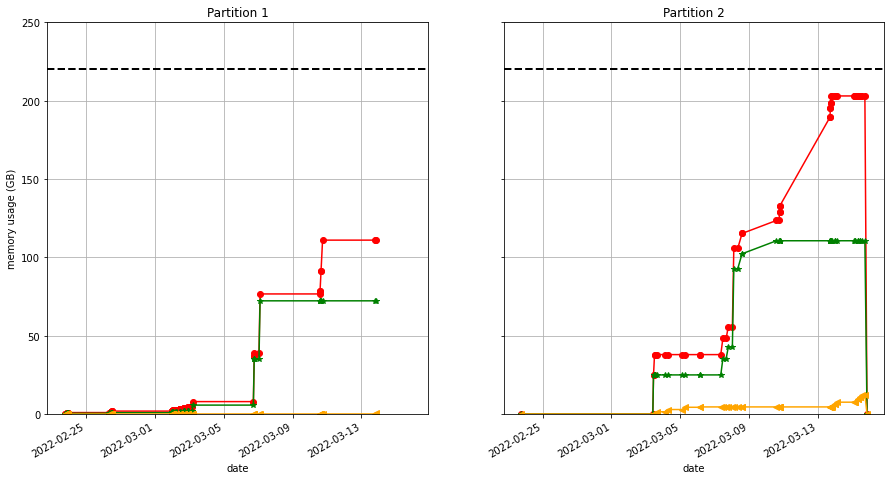

In [27]:
# xlim = (datetime.datetime(2022,3,10,0,00,0),datetime.datetime(2022,3,16,0,0,0))
plot_tot(phi,ylim=(0,250), xlim=None)
# plt.savefig('/home/calchetti/MPStemp/pics/TM/conj_v5.1.png')

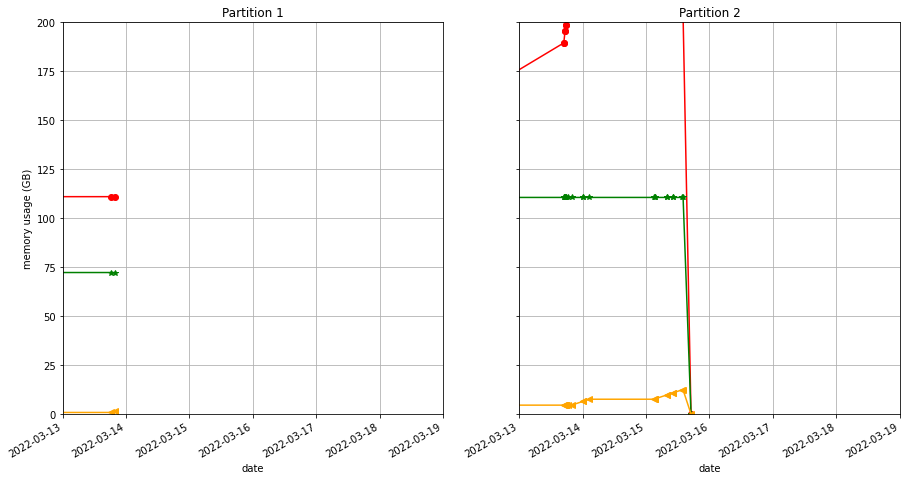

In [28]:
xlim = (datetime.datetime(2022,3,13,0,0,0),datetime.datetime(2022,3,19,0,0,0))
plot_tot(PHI,ylim=(0,200), xlim=xlim)


# <span style="color:orange"> *RSW 2*</span>

# <span style="color:blue">FDT Flat Calibration</span>

In [29]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-15T23:30:00'))
i = 1
###########################################################
t0 = datetime.datetime.fromisoformat('2022-03-16T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-03-16T00:55:00')
a15 = PHI_MODE('FDT')
kw = a15.observation(t0,t1,cadence=6,shape=(2048,2048,4,6)); phi.saving(1,**kw); PHI.saving(1,**kw)

kw = a15.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw)
kw = a15.compressing(kw['end'], nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw)

print('')
printp(a15, label='FDT FLat Calibration - 2')

# print('packing duration:',a15.raw.pack.end)
########################################################
# printp(a15)

# _ = phi.plot(1,bar=True)
# plot_tot(PHI)


FDT FLat Calibration - 2
number of datasets: 9
cadence: 6 mins
duration: 0:55:00
amount of raw-data at 32 bits: 3570.6 MiB, 396.7 MiB per dataset
amount of pack-data at 16 bits: 1853.9 MiB, 206.0 MiB per dataset
packing time: 0:12:34.257600
compressing (+ flushing) time: 1:30:36.465984
amount of compressed data + metadata at 6 bits: 648.1 MiB, 72.0 MiB per dataset
amount of metadata:  144 MiB
amount of memory usage: 5424.5 MiB



# <span style="color:blue">R_BOTH_HRES_HCAD_Nanoflares</span>

In [30]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-16T23:30:00'))
i = 2
########################################################
t0 = datetime.datetime.fromisoformat('2022-03-17T00:00:00')
t1 = t0 + datetime.timedelta(hours=1)
a14 = PHI_MODE('HRT')
kw = a14.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# kw = a14.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a14.compressing(kw['end'], nbits = 6, ndata = -1,level='raw.pack'); phi.saving(i,**kw); PHI.saving(i,**kw)
# dtc += kw['end'] - kw['start']

kw = a14.processing(kw['end'],ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
a14, kw = flush_many([4000 - a15.compr.pack.data*1e6/2**20,4000], 15.7, a14, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 

# kw = a14.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']

print('')
printp(a14, label='R_BOTH_HRES_HCAD_Nanoflares - 3')
########################################################
# printp(a14)
# plot_tot(PHI)

Days needed: 1
Exceeding the number of datasets, ndata set to 60

R_BOTH_HRES_HCAD_Nanoflares - 3
number of datasets: 60
cadence: 1 mins
duration: 1:00:00
amount of raw-data at 32 bits: 23803.7 MiB, 396.7 MiB per dataset
processing time: 1 day, 11:00:00
amount of processed data (and intermediate data) at 16 bits: 26550.3 MiB, 53.4 MiB per dataset
compressing (+ flushing) time: 2:09:25.747200
amount of compressed data + metadata at 6 bits: 925.7 MiB, 15.4 MiB per dataset
amount of metadata:  960 MiB
amount of memory usage: 50811.8 MiB



# <span style="color:blue">L_SMALL_HRES_HCAD_Slow-Wind-Connection L_FULL_HRES_HCAD_Coronal-Dynamics L_FULL_HRES_HCAD_Eruption-Watch</span>
## <span style="color:blue">Part 1 </span>

In [31]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-16T23:30:00'))
i=1
########################################################

t0 = datetime.datetime.fromisoformat('2022-03-17T00:00:00')
t1 = t0 + datetime.timedelta(days=5,hours=0)

cad = 6*60
N = int((t1 - t0).total_seconds() / (60*cad))

ti = t0
deltat = (t1 - t0)/N
min1 = datetime.timedelta(minutes=1)
for n in range(N):
    a16 = PHI_MODE('FDT')
    # ti = ti + dt
    kw = a16.observation(ti,ti+min1,cadence=1,shape=(2048,1792,4,6));
    phi.saving(1,**kw); PHI.saving(1,**kw)

    t0 = a16.raw.end
    kw = a16.cropping(t0,ndata=-1,crop=[1792,1792],level='raw');
    phi.saving(i,**kw); PHI.saving(i,**kw)
    dt += kw['end'] - kw['start']
    # kw = a16.packing(a16.raw.crop.end,ndata=-1,level='raw.crop');
    # phi.saving(i,**kw); PHI.saving(i,**kw)
    # dt += kw['end'] - kw['start']
    kw = a16.processing(a16.raw.crop.end,ndata=-1,partialStore=0x00,level='raw.crop',nout=5);
    phi.saving(i,**kw); PHI.saving(i,**kw)
    dt += kw['end'] - kw['start']
    kw = a16.compressing(kw['end'], nbits = 6, ndata = -1,level='proc.crop'); phi.saving(i,**kw);
    PHI.saving(i,**kw)
    dtc += kw['end'] - kw['start']
    ti = ti + deltat
    # t0 = ti

    # printp(a16)
    # print('')

print(N,'total datasets:\n')
printp(a16, label='L_FULL_HRES_HCAD_Coronal-Dynamics - 2')

20 total datasets:

L_FULL_HRES_HCAD_Coronal-Dynamics - 2
number of datasets: 1
cadence: 1 mins
duration: 0:01:00
amount of raw-data at 32 bits: 351.0 MiB, 351.0 MiB per dataset
amount of crop-data at 32 bits: 305.2 MiB, 305.2 MiB per dataset
cropping time: 0:01:01.366000
processing time: 0:35:00
amount of processed data (and intermediate data) at 16 bits: 343.3 MiB, 45.8 MiB per dataset
compressing (+ flushing) time: 0:01:39.937920
amount of compressed data + metadata at 6 bits: 11.9 MiB, 11.9 MiB per dataset
amount of metadata:  24 MiB
amount of memory usage: 1007.1 MiB



# <span style="color:blue">L_SMAL_HRES_HCAD_Slow-Wind-Connection</span>

In [32]:

# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-25T23:30:00'))
i = 2
########################################################
t0 = datetime.datetime.fromisoformat('2022-03-18T00:00:00')
t1 = t0 + datetime.timedelta(minutes=20)
a16_1 = PHI_MODE('HRT')
kw = a16_1.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# kw = a16_1.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw)
# dt += kw['end'] - kw['start']
kw = a16_1.processing(kw['end']+datetime.timedelta(hours=2),ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw)
dt += kw['end'] - kw['start']

kw = a16_1.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw)
dtc += kw['end'] - kw['start']

print('')
printp(a16_1, label='L_SMAL_HRES_HCAD_Slow-Wind-Connection - HiRes')
print('==============================')

t0 = datetime.datetime.fromisoformat('2022-03-19T00:00:00')
t1 = t0 + datetime.timedelta(minutes=20)
a16_1 = PHI_MODE('HRT')
kw = a16_1.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# kw = a16_1.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw)
# dt += kw['end'] - kw['start']
kw = a16_1.processing(kw['end']+datetime.timedelta(hours=2),ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw)
dt += kw['end'] - kw['start']

kw = a16_1.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw)
dtc += kw['end'] - kw['start']

print('')
printp(a16_1, label='L_SMAL_HRES_HCAD_Slow-Wind-Connection - HiRes')
print('==============================')
t0 = datetime.datetime.fromisoformat('2022-03-20T00:00:00')
t1 = t0 + datetime.timedelta(minutes=20)
a16_1 = PHI_MODE('HRT')
kw = a16_1.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# kw = a16_1.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw)
# dt += kw['end'] - kw['start']
kw = a16_1.processing(kw['end']+datetime.timedelta(hours=2),ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw)
dt += kw['end'] - kw['start']

kw = a16_1.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw)
dtc += kw['end'] - kw['start']

print('')
printp(a16_1, label='L_SMAL_HRES_HCAD_Slow-Wind-Connection - HiRes')
print('==============================')
t0 = datetime.datetime.fromisoformat('2022-03-21T00:00:00')
t1 = t0 + datetime.timedelta(minutes=20)
a16_1 = PHI_MODE('HRT')
kw = a16_1.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# kw = a16_1.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw)
# dt += kw['end'] - kw['start']
kw = a16_1.processing(kw['end']+datetime.timedelta(hours=2),ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw)
dt += kw['end'] - kw['start']

kw = a16_1.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw)
dtc += kw['end'] - kw['start']

print('')
printp(a16_1, label='L_SMAL_HRES_HCAD_Slow-Wind-Connection - HiRes')
print('==============================')
t0 = datetime.datetime.fromisoformat('2022-03-22T00:00:00')
t1 = t0 + datetime.timedelta(minutes=60)
a16_1 = PHI_MODE('HRT')
kw = a16_1.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# kw = a16_1.packing(kw['end'],ndata=-1,level='raw'); phi.saving(i,**kw); PHI.saving(i,**kw)
# dt += kw['end'] - kw['start']
kw = a16_1.processing(kw['end']+datetime.timedelta(hours=2),ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw)
dt += kw['end'] - kw['start']

kw = a16_1.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw)
dtc += kw['end'] - kw['start']

print('')
printp(a16_1, label='L_SMAL_HRES_HCAD_Slow-Wind-Connection - HiRes')
print('==============================')

# plot_tot(PHI)


L_SMAL_HRES_HCAD_Slow-Wind-Connection - HiRes
number of datasets: 20
cadence: 1 mins
duration: 0:20:00
amount of raw-data at 32 bits: 7934.6 MiB, 396.7 MiB per dataset
processing time: 11:40:00
amount of processed data (and intermediate data) at 16 bits: 8850.1 MiB, 53.4 MiB per dataset
compressing (+ flushing) time: 0:43:08.582400
amount of compressed data + metadata at 6 bits: 308.6 MiB, 15.4 MiB per dataset
amount of metadata:  320 MiB
amount of memory usage: 16937.3 MiB


L_SMAL_HRES_HCAD_Slow-Wind-Connection - HiRes
number of datasets: 20
cadence: 1 mins
duration: 0:20:00
amount of raw-data at 32 bits: 7934.6 MiB, 396.7 MiB per dataset
processing time: 11:40:00
amount of processed data (and intermediate data) at 16 bits: 8850.1 MiB, 53.4 MiB per dataset
compressing (+ flushing) time: 0:43:08.582400
amount of compressed data + metadata at 6 bits: 308.6 MiB, 15.4 MiB per dataset
amount of metadata:  320 MiB
amount of memory usage: 16937.3 MiB


L_SMAL_HRES_HCAD_Slow-Wind-Connection

# <span style="color:red"> Flushing RSW1 data from partition 1</span>

In [33]:
print(kw['end'])
i = 1
# kw = a7.compressing(kw['end'], nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw); PHI.saving(1,**kw); dtc += kw['end'] - kw['start']

a7, kw = flush_many([2000,2000], 72.7, a7, kw['end'], 6, a7.raw.n_datasets-10 , 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 

# kw = a8.compressing(kw['end'], nbits = 6, ndata = -1,level='raw.pack'); phi.saving(1,**kw); PHI.saving(1,**kw); dtc += kw['end'] - kw['start']
a8, kw = flush_many([2000 - a7.compr.pack.data*1e6/2**20,2000], 72.7, a8, kw['end'], 6, -1, 'raw.pack',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 

print('compressed data: ',(a7.compr.pack.data_tot + a8.compr.pack.data_tot)/1e3)


2022-03-23 16:09:25.747200
Days needed: 3
Exceeding the number of datasets, ndata set to 8
Days needed: 4
Exceeding the number of datasets, ndata set to 20
compressed data:  12.081035520000002


# <span style="color:blue">L_SMALL_HRES_HCAD_Slow-Wind-Connection L_FULL_HRES_HCAD_Coronal-Dynamics L_FULL_HRES_HCAD_Eruption-Watch</span>
## <span style="color:blue">Part 2 </span>

In [34]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-16T23:30:00'))
i=1
########################################################

t0 = datetime.datetime.fromisoformat('2022-03-22T00:00:00')
t1 = t0 + datetime.timedelta(days=8,hours=0)

cad = 6*60
N = int((t1 - t0).total_seconds() / (60*cad))

ti = t0
deltat = (t1 - t0)/N
min1 = datetime.timedelta(minutes=1)
for n in range(N):
    a16 = PHI_MODE('FDT')
    # ti = ti + dt
    kw = a16.observation(ti,ti+min1,cadence=1,shape=(2048,1792,4,6));
    phi.saving(1,**kw); PHI.saving(1,**kw)

    t0 = a16.raw.end
    kw = a16.cropping(t0,ndata=-1,crop=[1792,1792],level='raw');
    phi.saving(i,**kw); PHI.saving(i,**kw)
    dt += kw['end'] - kw['start']
    kw = a16.processing(a16.raw.crop.end,ndata=-1,partialStore=0x00,level='raw.crop',nout=5);
    phi.saving(i,**kw); PHI.saving(i,**kw)
    dt += kw['end'] - kw['start']
    kw = a16.compressing(a16.proc.crop.end, nbits = 6, ndata = -1,level='proc.crop'); phi.saving(i,**kw);
    PHI.saving(i,**kw)
    dtc += kw['end'] - kw['start']
    ti = ti + deltat
    # t0 = ti

    # printp(a16)
    # print('')

print(N,'total datasets:\n')
printp(a16, label='L_FULL_HRES_HCAD_Coronal-Dynamics - 2')

32 total datasets:

L_FULL_HRES_HCAD_Coronal-Dynamics - 2
number of datasets: 1
cadence: 1 mins
duration: 0:01:00
amount of raw-data at 32 bits: 351.0 MiB, 351.0 MiB per dataset
amount of crop-data at 32 bits: 305.2 MiB, 305.2 MiB per dataset
cropping time: 0:01:01.366000
processing time: 0:35:00
amount of processed data (and intermediate data) at 16 bits: 343.3 MiB, 45.8 MiB per dataset
compressing (+ flushing) time: 0:01:39.937920
amount of compressed data + metadata at 6 bits: 11.9 MiB, 11.9 MiB per dataset
amount of metadata:  24 MiB
amount of memory usage: 1007.1 MiB



# <span style="color:magenta">***RESET NANDs***</span>

In [35]:
print('cropping, processing and packing duration:',dt)
print('compression duration:',dtc)

cropping, processing and packing duration: 9 days, 13:44:23.774560
compression duration: 8:00:41.848640


In [36]:
end = kw['end']
# tm0 = datetime.datetime(2022,3,16,0,0,0)
# tm1 = datetime.datetime(2022,3,30,0,0,0)
# _ = tm_avail(tm0,tm1,df_tm,frac=.2)
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
# print('TM time:',round((PHI.part1.compr + PHI.part2.compr)/1464,2), 'days')

PHI.format_partition(1,end)
PHI.format_partition(2,PHI.part1.history['end'][-1] + datetime.timedelta(hours=.5))
phi.format_partition(1,end)
phi.format_partition(2,PHI.part1.history['end'][-1] + datetime.timedelta(hours=.5))


amount of compressed data + metadata in partition 1: 14.13 GB
amount of compressed data + metadata in partition 2: 3.24 GB


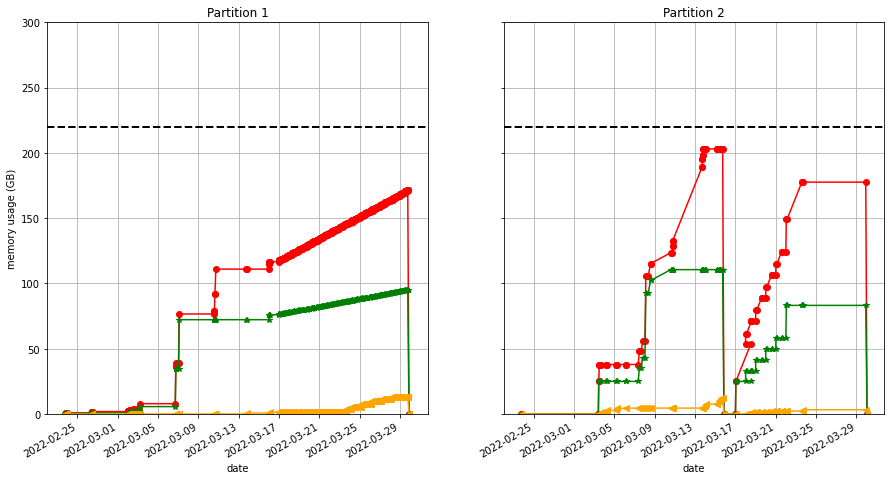

In [37]:
plot_tot(phi, time_ord=True, ylim=(0,300))

# <span style="color:orange"> *RSW 3*</span>

In [38]:
dt = datetime.timedelta(seconds=0)
dtc = datetime.timedelta(seconds=0)


# <span style="color:blue">R_BOTH_HRES_HCAD_Nanoflares</span>

In [39]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-29T23:30:00'))
i = 2
########################################################
t0 = datetime.datetime.fromisoformat('2022-03-30T00:00:00')
t1 = t0 + datetime.timedelta(hours=1)
a14_1 = PHI_MODE('HRT')
kw = a14_1.observation(t0,t1,cadence=1,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

########################################################
# print('N datsets:',a14_1.raw.n_datasets)
printp(a14_1, label='R_BOTH_HRES_HCAD_Nanoflares - 4 (observation)')
# plot_tot(PHI)

R_BOTH_HRES_HCAD_Nanoflares - 4 (observation)
number of datasets: 60
cadence: 1 mins
duration: 1:00:00
amount of raw-data at 32 bits: 23803.7 MiB, 396.7 MiB per dataset
amount of metadata:  480 MiB
amount of memory usage: 23803.7 MiB



# <span style="color:blue">R_SMALL_HRES_MCAD_Polar-Observations</span>

In [40]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-30T05:30:00'))
i = 2
t0 = datetime.datetime.fromisoformat('2022-03-30T03:30:00')
t1 = datetime.datetime.fromisoformat('2022-03-30T05:00:00')
a7_1 = PHI_MODE('HRT')
kw = a7_1.observation(t0,t1,cadence=2,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# print('N datsets:',a7_1.raw.n_datasets)
printp(a7_1, label='R_SMALL_HRES_MCAD_Polar-Observations - 2 (observation)')


R_SMALL_HRES_MCAD_Polar-Observations - 2 (observation)
number of datasets: 45
cadence: 2 mins
duration: 1:30:00
amount of raw-data at 32 bits: 17852.8 MiB, 396.7 MiB per dataset
amount of metadata:  360 MiB
amount of memory usage: 17852.8 MiB



# <span style="color:blue">L_SMALL_MRES_MCAD_Connection-Mosaic</span>

In [41]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-29T23:30:00'))
i = 2
########################################################
t0 = datetime.datetime.fromisoformat('2022-03-30T09:00:00')
t1 = datetime.datetime.fromisoformat('2022-03-31T12:00:00')
a17 = PHI_MODE('HRT')

kw = a17.observation(t0,t1,cadence=20,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)
# print('N datsets:',a17.raw.n_datasets)

########################################################
printp(a17, label='L_SMALL_MRES_MCAD_Connection-Mosaic - 2 (observation)')
# plot_tot(PHI)

L_SMALL_MRES_MCAD_Connection-Mosaic - 2 (observation)
number of datasets: 81
cadence: 20 mins
duration: 1 day, 3:00:00
amount of raw-data at 32 bits: 32135.0 MiB, 396.7 MiB per dataset
amount of metadata:  648 MiB
amount of memory usage: 32135.0 MiB



# <span style="color:blue">R_SMALL_MRES_MCAD_AR-Long-Term</span>

In [42]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-03-31T11:30:00'))
i = 1
########################################################
t0 = datetime.datetime.fromisoformat('2022-03-31T17:56:00')
t1 = datetime.datetime.fromisoformat('2022-04-04T16:20:00')
a18 = PHI_MODE('HRT')
kw = a18.observation(t0,t1,cadence=30,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

########################################################
# print('N datsets:',a18.raw.n_datasets)
printp(a18, label = 'R_SMALL_MRES_MCAD_AR-Long-Term (observation)')
# plot_tot(PHI)

R_SMALL_MRES_MCAD_AR-Long-Term (observation)
number of datasets: 188
cadence: 30 mins
duration: 3 days, 22:24:00
amount of raw-data at 32 bits: 74585.0 MiB, 396.7 MiB per dataset
amount of metadata:  1504 MiB
amount of memory usage: 74585.0 MiB



# <span style="color:blue">R_SMALL_HRES_MCAD_Polar-Observations</span>

In [43]:
# phi = PHI_MEMORY(datetime.datetime.fromisoformat('2022-04-04T08:00:00'))
i = 2
t0 = datetime.datetime.fromisoformat('2022-04-04T16:25:00')
t1 = datetime.datetime.fromisoformat('2022-04-05T23:43:00')
a7_2 = PHI_MODE('HRT')
kw = a7_2.observation(t0,t1,cadence=30,shape=(2048,2048,4,6)); phi.saving(i,**kw); PHI.saving(i,**kw)

# print('N datsets:',a7_2.raw.n_datasets)
printp(a7_2, label='R_SMALL_HRES_MCAD_Polar-Observations - 3 (observation)')
end = kw['end']

R_SMALL_HRES_MCAD_Polar-Observations - 3 (observation)
number of datasets: 62
cadence: 30 mins
duration: 1 day, 7:18:00
amount of raw-data at 32 bits: 24597.2 MiB, 396.7 MiB per dataset
amount of metadata:  496 MiB
amount of memory usage: 24597.2 MiB



# <span style="color:red">Processing and Flushing</span>

In [44]:
max_fl = 1000

"""
    Processing of AR-Long Term
"""
i = 1
t0 = end#a17.compr.end
kw = a18.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']
# kw = a18.compressing(a18.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
a18, kw = flush_many([max_fl,max_fl], 15.7, a18, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a18, label = 'R_SMALL_MRES_MCAD_AR-Long-Term (full)')

"""
    Processing of Nanoflares 4
"""
i = 2
t0 = kw['end'] #a18.compr.end
kw = a14_1.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']

"""
    Processing of Polar Observation 2
"""
i = 2
t0 = kw['end'] #a14_1.compr.end
kw = a7_1.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']

"""
    Processing of Connection Mosaic 2
"""
i = 2
t0 = kw['end'] #a7_1.compr.end
kw = a17.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']

"""
    Processing of Polar Observation 3
"""
i = 2
t0 = kw['end'] #a18.compr.end
kw = a7_2.processing(t0,ndata=-1,partialStore=0x00,level='raw',nout=5); phi.saving(i,**kw); PHI.saving(i,**kw); dt += kw['end'] - kw['start']

"""
Flushing
"""


i=2
# kw = a14_1.compressing(kw['end'], nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
a14_1, kw = flush_many([max_fl,max_fl], 15.7, a14_1, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a14_1, label = 'Nanoflares - 4 (full)')
print('==============================')

i=2
# kw = a7_1.compressing(a7_1.proc.end, nbits = 5, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
a7_1, kw = flush_many([max_fl  - a14_1.compr.data*1e6/2**20, max_fl], 13.2, a7_1, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a7_1, label = 'Polar Observation - 2 (full)')
print('==============================')

i=2
# kw = a17.compressing(a17.proc.end, nbits = 6, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
a17, kw = flush_many([max_fl  - a7_1.compr.data*1e6/2**20, max_fl], 15.7, a17, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a17, label = 'Connection Mosaic - 2 (full)')
print('==============================')

i=2
# kw = a7_2.compressing(a7_2.proc.end, nbits = 5, ndata = -1,level='proc'); phi.saving(i,**kw); PHI.saving(i,**kw); dtc += kw['end'] - kw['start']
a7_2, kw = flush_many([max_fl  - a17.compr.data*1e6/2**20, max_fl], 13.2, a7_2, kw['end'], 6, -1, 'proc',i)#; phi.saving(i,**kw); PHI.saving(i,**kw); 
printp(a7_2, label = 'Polar Observation - 3 (full)')
print('==============================')






Days needed: 4
Exceeding the number of datasets, ndata set to 2
R_SMALL_MRES_MCAD_AR-Long-Term (full)
number of datasets: 188
cadence: 30 mins
duration: 3 days, 22:24:00
amount of raw-data at 32 bits: 74585.0 MiB, 396.7 MiB per dataset
processing time: 4 days, 13:40:00
amount of processed data (and intermediate data) at 16 bits: 83190.9 MiB, 53.4 MiB per dataset
compressing (+ flushing) time: 0:04:18.858240
amount of compressed data + metadata at 6 bits: 2900.7 MiB, 15.4 MiB per dataset
amount of metadata:  3008 MiB
amount of memory usage: 159210.2 MiB

Days needed: 1
Exceeding the number of datasets, ndata set to 60
Nanoflares - 4 (full)
number of datasets: 60
cadence: 1 mins
duration: 1:00:00
amount of raw-data at 32 bits: 23803.7 MiB, 396.7 MiB per dataset
processing time: 1 day, 11:00:00
amount of processed data (and intermediate data) at 16 bits: 26550.3 MiB, 53.4 MiB per dataset
compressing (+ flushing) time: 2:09:25.747200
amount of compressed data + metadata at 6 bits: 925.7 Mi

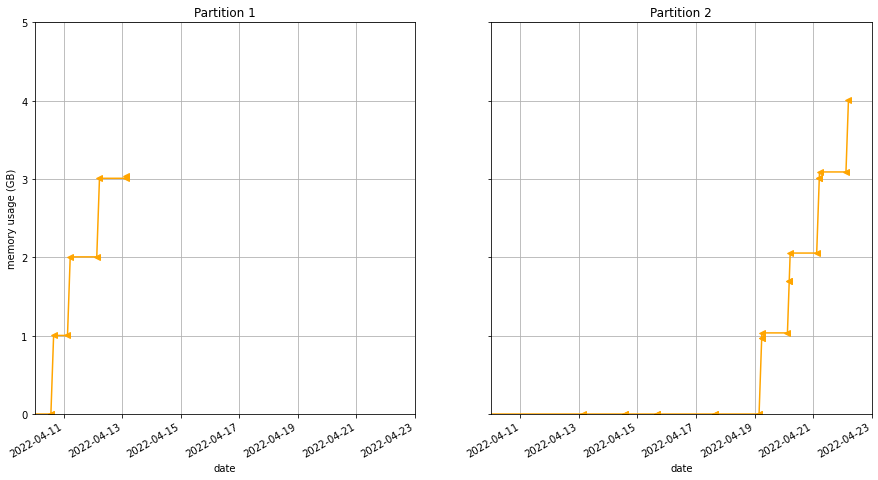

In [45]:
plot_tot(phi, time_ord=True, ylim=(0,5), xlim=(datetime.date(2022,4,10),datetime.date(2022,4,23)))

# <span style="color:magenta">***RESET NANDs***</span>

In [46]:
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
# print('TM time:',round((PHI.part1.compr)/550,2), 'days\n')

t0 = datetime.datetime.fromisoformat('2022-04-14T02:00:00')
PHI.format_partition(1,t0)
PHI.format_partition(2,kw['end'])
phi.format_partition(1,t0)
phi.format_partition(2,kw['end'])
# PHI.format_partition(1,kw['end'])
# PHI.format_partition(2,PHI.part1.history['end'][-1] + datetime.timedelta(hours=.5))
# phi.format_partition(1,kw['end'])
# phi.format_partition(2,PHI.part1.history['end'][-1] + datetime.timedelta(hours=.5))

amount of compressed data + metadata in partition 1: 3.04 GB
amount of compressed data + metadata in partition 2: 4.01 GB


# <span style="color:blue">Synoptic</span>

In [47]:
i=1
########################################################

t0 = datetime.datetime.fromisoformat('2022-04-15T00:00:00')
t1 = datetime.datetime.fromisoformat('2022-05-01T00:00:00')

cad = 6*60
N = int((t1 - t0).total_seconds() / (60*cad))

ti = t0
deltat = (t1 - t0)/N
min1 = datetime.timedelta(minutes=1)
form = False
for n in range(N):
    a19 = PHI_MODE('FDT')
    # ti = ti + dt
    kw = a19.observation(ti,ti+min1,cadence=1,shape=(2048,1792,4,6));
    phi.saving(i,**kw); PHI.saving(i,**kw)

    t0 = a19.raw.end
    kw = a19.cropping(t0,ndata=-1,crop=[1792,1792],level='raw');
    phi.saving(i,**kw); PHI.saving(i,**kw)
    kw = a19.processing(a19.raw.crop.end,ndata=-1,partialStore=0x00,level='raw.crop',nout=3);
    phi.saving(i,**kw); PHI.saving(i,**kw)
    kw = a19.compressing(a19.proc.crop.end, nbits = 6, ndata = -1,level='proc.crop'); phi.saving(i,**kw);
    PHI.saving(i,**kw)
    ti = ti + deltat
    if PHI.part1.occu > 200e3 or PHI.part2.occu > 200e3:
        PHI.format_partition(i,kw['end'])
        phi.format_partition(i,kw['end'])
        i = i%2 + 1

    # if ti > a18.compr.end:
    #     if not form:
    #         print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')
    #         print('TM time:',round((PHI.part2.compr)/550,2), 'days\n')

    #         PHI.format_partition(2,kw['end'])
    #         # PHI.format_partition(2,end + datetime.timedelta(days=1))
    #         phi.format_partition(2,kw['end'])
    #         # phi.format_partition(2,end + datetime.timedelta(days=1))
    #         form = True
    # t0 = ti

    # printp(a19)
    # print('')

tm0 = datetime.datetime(2022,6,1,0,0,0)
tm1 = datetime.datetime(2022,7,1,0,0,0)
# _ = tm_avail(tm0,tm1,df_tm,frac=.3)
print('amount of compressed data + metadata in partition 1:',round(PHI.part1.compr*1e-3,2), 'GB')
# print('amount of compressed data + metadata in partition 2:',round(PHI.part2.compr*1e-3,2), 'GB')


print(N,'total datasets:\n')
printp(a19, label = 'Synoptic (1 dataset)')


amount of compressed data + metadata in partition 1: 0.48 GB
64 total datasets:

Synoptic (1 dataset)
number of datasets: 1
cadence: 1 mins
duration: 0:01:00
amount of raw-data at 32 bits: 351.0 MiB, 351.0 MiB per dataset
amount of crop-data at 32 bits: 305.2 MiB, 305.2 MiB per dataset
cropping time: 0:01:01.366000
processing time: 0:35:00
amount of processed data (and intermediate data) at 16 bits: 328.1 MiB, 30.5 MiB per dataset
compressing (+ flushing) time: 0:00:59.962752
amount of compressed data + metadata at 6 bits: 7.1 MiB, 7.1 MiB per dataset
amount of metadata:  24 MiB
amount of memory usage: 991.8 MiB



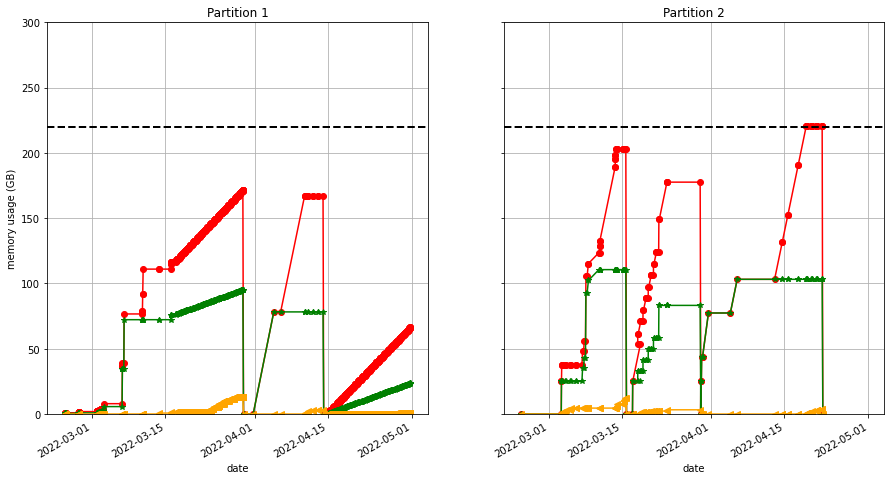

In [48]:
plot_tot(phi, time_ord=True, ylim=(0,300))

# <span style="color:yellow">PLOTS</span>

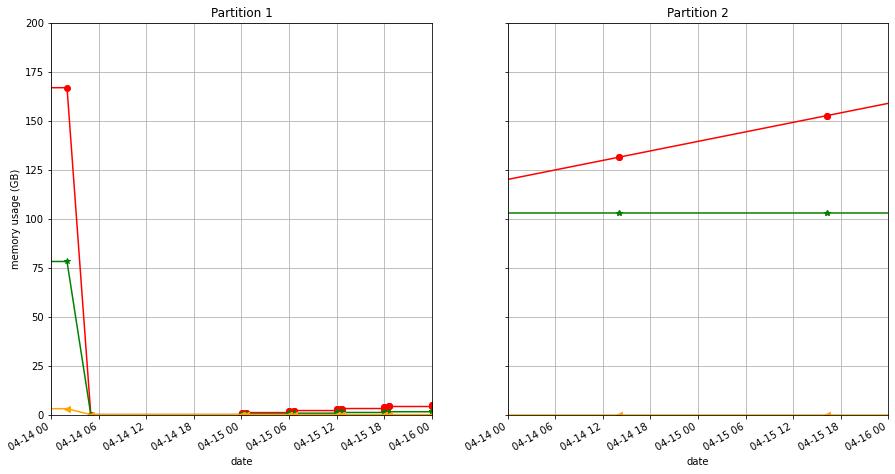

In [49]:
xlim = (datetime.datetime(2022,4,14,0,0,0),datetime.datetime(2022,4,16,0,0,0))
plot_tot(PHI, xlim=xlim, ylim=(0,200), time_ord=True)
# plt.savefig('/home/calchetti/MPStemp/pics/TM/total_v5.1.png')

# fname = '/home/calchetti/MPStemp/PHI_TMtool/TM_NMP1_v2.csv'
# PHI.save(fname)

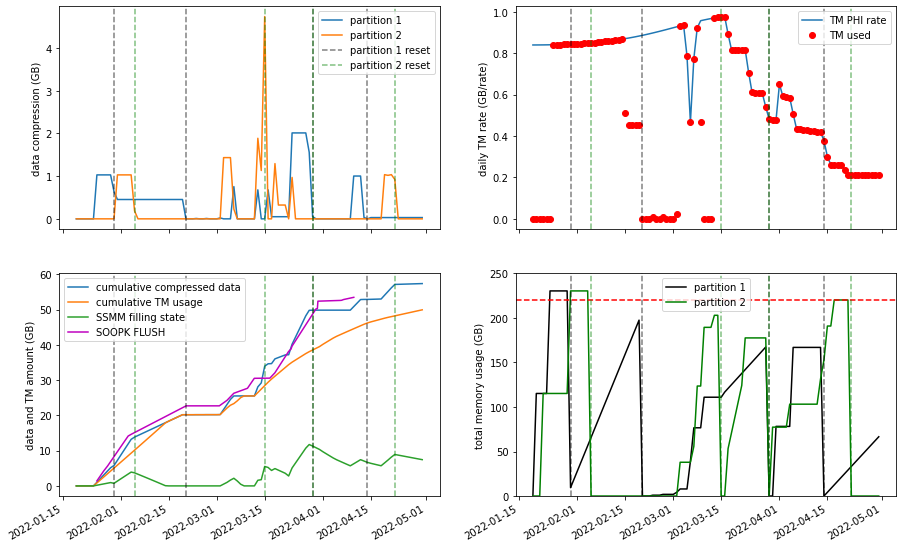

In [50]:
from scipy.interpolate import interp1d
tot1 = np.asarray(PHI.part1.history['occu'])
tot2 = np.asarray(PHI.part2.history['occu'])
c1 = np.asarray(PHI.part1.history['compr'])
c2 = np.asarray(PHI.part2.history['compr'])
d1 = np.asarray(PHI.part1.history['start'])
d2 = np.asarray(PHI.part2.history['start'])

starttime = min(d1[0],d2[0])
endtime = max(d1[-1],d2[-1])
t0 = starttime
times = []
while starttime.date() <= endtime.date():
    times.append(starttime.date())
    starttime += datetime.timedelta(days=1)
starttime = t0; del t0
times_float = [(t - d1[0]).total_seconds() for t in d1]
times = np.asarray(times)

s = np.argsort(d1)

newtot1 = np.zeros(np.size(times))
for i,j in zip(d1,tot1):
    if True:
        ind = np.where(times == i.date())[0]
        newtot1[ind] += j/1e3
newtot1 = np.asarray(newtot1)

newtot2 = np.zeros(np.size(times))
for i,j in zip(d2,tot2):
    if True:
        ind = np.where(times == i.date())[0]
        newtot2[ind] += j/1e3
newtot2 = np.asarray(newtot2)

newc1 = np.zeros(np.size(times))
for i,j in zip(d1,c1):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc1[ind] += j/1e3
newc1 = np.asarray(newc1)


newc2 = np.zeros(np.size(times))
for i,j in zip(d2,c2):
    if j>=0:
        ind = np.where(times == i.date())[0]
        newc2[ind] += j/1e3
newc2 = np.asarray(newc2)

form1 = np.zeros(np.size(times))
for i,j in zip(d1,c1):
    if j<0:
        ind = np.where(times == i.date())[0]
        form1[ind] += j/1e3
form1 = np.asarray(form1)


form2 = np.zeros(np.size(times))
for i,j in zip(d2,c2):
    if j<0:
        ind = np.where(times == i.date())[0]
        form2[ind] += j/1e3
form2 = np.asarray(form2)

trig1 = np.where(form1 < 0)[0]
trig2 = np.where(form2 < 0)[0]

x = TM['date'][np.logical_and(TM['date'] <= endtime+datetime.timedelta(days=1),TM['date'] >= starttime-datetime.timedelta(days=1))]
y = TM['tm_rate'][np.logical_and(TM['date'] <= endtime+datetime.timedelta(days=1),TM['date'] >= starttime-datetime.timedelta(days=1))]
z = TM['duration'][np.logical_and(TM['date'] <= endtime+datetime.timedelta(days=1),TM['date'] >= starttime-datetime.timedelta(days=1))]

xx = [(i - starttime).total_seconds() for i in x]
f = interp1d(xx, y*z)
xnew = [(i - starttime.date()).total_seconds() for i in times]
ynew = f(xnew)/8e9
ynew[times<datetime.date(2022,4,1)] *= .2
ynew[times>=datetime.date(2022,4,1)] *= .3

tm_used = np.zeros(times.size)
down = 0#np.zeros(times.size)
for i in range(times.size):
    if newc1[i] > 0 or newc2[i] > 0:
        tm_used[i] = min(ynew[i],np.sum(newc1[:i+1] + newc2[:i+1]) - tm_used[:i].sum())
        down = max(0,np.sum(newc1[:i+1] + newc2[:i+1] - tm_used[:i+1]))
    else:
        if down > 0:
            tm_used[i] = min(ynew[i],np.sum(newc1[:i+1] + newc2[:i+1]) - tm_used[:i].sum())
            down = max(0,np.sum(newc1[:i+1] + newc2[:i+1] - tm_used[:i+1]))

plt.figure(figsize=(15,10))
plt.subplot(221)
plt.ylabel('data compression (GB)')
plt.plot(times,newc1,label='partition 1')
plt.plot(times,newc2,label='partition 2')
for i,t in enumerate(trig1):
    if i == 0:
        plt.axvline(times[t],linestyle='--',color='k',alpha=.5,label='partition 1 reset')
    else:
        plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for i,t in enumerate(trig2):
    if i == 0:
        plt.axvline(times[t],linestyle='--',color='g',alpha=.5,label='partition 2 reset')
    else:
        plt.axvline(times[t],linestyle='--',color='g',alpha=.5)
plt.legend()

plt.subplot(222)
plt.ylabel('daily TM rate (GB/rate)')
plt.plot(times,ynew,label='TM PHI rate')
plt.plot(times,tm_used,'ro',label='TM used')
plt.legend()
for t in trig1:
    plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for t in trig2:
    plt.axvline(times[t],linestyle='--',color='g',alpha=.5)
# print('total TM used:',round(tm_used.sum(),2),'GB')
# print('total compressed data:',round((newc1+newc2).sum(),2),'GB')
# plt.xlim(datetime.date(2022,1,10),datetime.date(2022,2,5))
plt.subplot(223)
plt.ylabel('data and TM amount (GB)')
plt.plot(times,np.cumsum(newc1+newc2),label='cumulative compressed data')
plt.plot(times,np.cumsum(tm_used),label='cumulative TM usage')
plt.plot(times,np.cumsum(newc1+newc2)-np.cumsum(tm_used),label='SSMM filling state')
cond = np.logical_and(FL['date']>datetime.datetime(2022,1,19,0,0), FL['date']<datetime.datetime(2022,5,1,0,0))
plt.plot(FL['date'][cond],-np.cumsum(FL['flush'][cond]*2**20/1e9),'m',label='SOOPK FLUSH')
plt.legend()
for t in trig1:
    plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for t in trig2:
    plt.axvline(times[t],linestyle='--',color='g',alpha=.5)

plt.subplot(224)
plt.ylabel('total memory usage (GB)')
plt.plot(times,np.cumsum(newtot1),'k',label='partition 1')
plt.plot(times,np.cumsum(newtot2),'g',label='partition 2')
plt.legend()
plt.ylim(0,250)
plt.axhline(220,linestyle='--',color='r')
for t in trig1:
    plt.axvline(times[t],linestyle='--',color='k',alpha=.5)
for t in trig2:
    plt.axvline(times[t],linestyle='--',color='g',alpha=.5)

plt.gcf().autofmt_xdate()
# plt.savefig('/home/calchetti/MPStemp/pics/TM/tm_v5.1.png')

In [51]:
print('Total amount of TM used:',round(tm_used.sum(),2),'GB')
print('Total amount of compressed data:',round((newc1+newc2).sum(),2),'GB')

Total amount of TM used: 49.93 GB
Total amount of compressed data: 57.38 GB


In [52]:
(newc1+newc2)[times<datetime.date(2022,5,1)].sum()

57.37513452000002

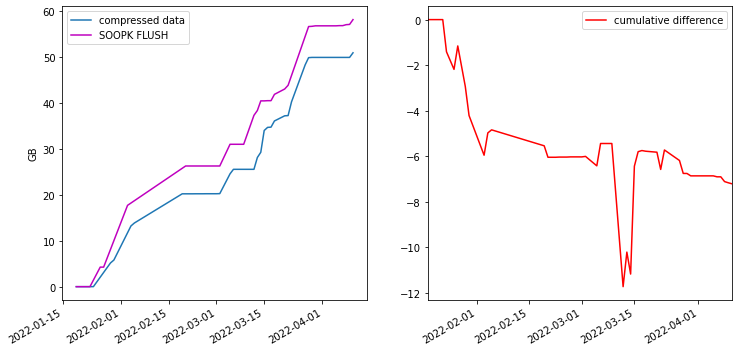

In [53]:
newfl = np.zeros(np.size(times))
for i,j in zip(FLnew['date'],FLnew['flush']):
    if j<=0:
        ind = np.where(times == i.date())[0]
        newfl[ind] += -j*2**20/1e9
newfl = np.asarray(newfl)
newfl[16] = newfl[17]
# newfl[15] = newfl[17]

xlim = (datetime.date(2022,1,19),datetime.date(2022,4,10)) # ltp6
# xlim = (datetime.date(2022,1,25),datetime.date(2022,2,4)) # helio + raw syn
# xlim = (datetime.date(2022,3,1),datetime.date(2022,3,8)) # slow wind
# xlim = (datetime.date(2022,3,8),datetime.date(2022,3,17)) # RSW 1 flushing
# xlim = (datetime.date(2022,3,16),datetime.date(2022,3,30)) # RSW 2
# xlim = (datetime.date(2022,3,31),datetime.date(2022,4,10)) # RSW 3

cond = np.logical_and(times>=xlim[0], times<=xlim[1])
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(times[cond],np.cumsum((newc1+newc2)[cond]),label='compressed data')
plt.plot(times[cond],np.cumsum(newfl[cond]),'m',label='SOOPK FLUSH')
plt.legend()
plt.ylabel('GB')

plt.subplot(122)
plt.plot(times[cond],np.cumsum((newc1+newc2)[cond]-newfl[cond]),'r',label='cumulative difference')

plt.xlim(xlim)
plt.gcf().autofmt_xdate()
plt.legend()

In [54]:
((newc1+newc2)[cond])*1e9/2**20

array([   0.        ,    0.        ,    0.        ,    0.        ,
          0.        ,    0.        ,  982.11593628,  982.11593628,
        982.11593628,  982.11593628,  982.11593628,  608.84555054,
       1414.32192993, 1414.32192993, 1414.32192993, 1414.32192993,
       1414.32192993,  608.84555054,  432.20599365,  432.20599365,
        432.20599365,  432.20599365,  432.20599365,  432.20599365,
        432.20599365,  432.20599365,  432.20599365,  432.20599365,
        432.20599365,  432.20599365,  432.20599365,  432.20599365,
          0.        ,    0.        ,    0.        ,    8.35830688,
          0.        ,    0.        ,    8.35830688,    0.        ,
          0.        ,    0.        ,   20.89576721, 1368.16307831,
       1368.16307831, 1368.16307831,  936.1115799 ,    0.        ,
          0.        ,    0.        ,    0.        ,    0.        ,
          0.        , 2448.29182434, 1080.12874603, 4520.50481415,
        648.07724762,   47.65411377, 1281.98638916,  356.23718